In [13]:
from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import seaborn as sns
import math

In [14]:
point = np.array([80, 150])

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_arb_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_arb_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_arb_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

sample_path_mlda = '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_arb_mlda.h5'
fin = h5py.File(sample_path_mlda)
mlda_samples = np.array( fin['/samples'])
fin.close()

path_meshs = [
        "data/mesh_20_1.msh",
        "data/mesh_20_2.msh",
        "data/mesh_20_3.msh"]

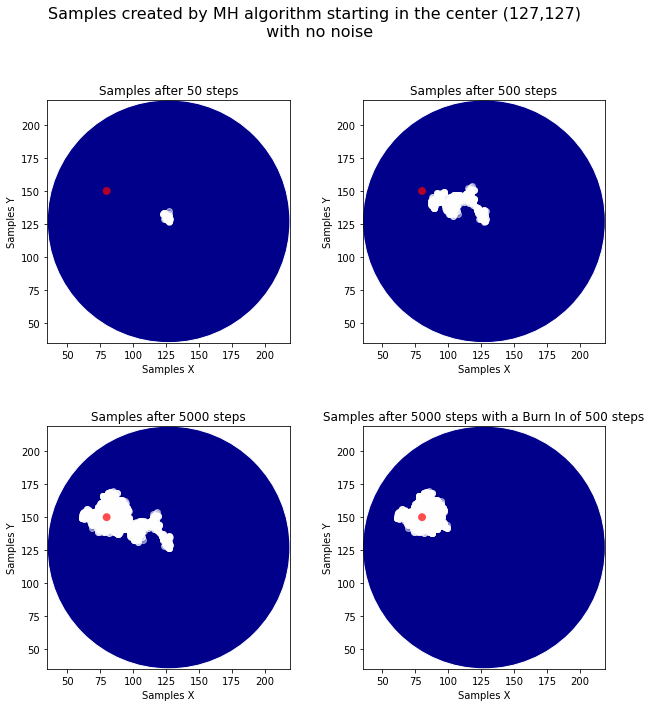

In [15]:
s = samples[-1]

fig, ax = plt.subplots(2, 2, figsize=(10,11))
fig.subplots_adjust(wspace=.3)

evaluations.set_ax(ax[0,0],"darkblue")
ax[0,0].scatter(s[0, 0:50], s[1, 0:50], c='white', alpha=0.5)
evaluations.draw_point(ax[0,0],point,0.7)

evaluations.set_ax(ax[0,1],"darkblue")
ax[0,1].scatter(s[0, 0:500], s[1, 0:500], c='white', alpha=0.5)
evaluations.draw_point(ax[0,1],point,0.7)

evaluations.set_ax(ax[1,0],"darkblue")
ax[1,0].scatter(s[0, 0:5000], s[1, 0:5000], c='white', alpha=0.5)
evaluations.draw_point(ax[1,0],point,0.7)

evaluations.set_ax(ax[1,1],"darkblue")
ax[1,1].scatter(s[0, 500:5000], s[1, 500:5000], c='white', alpha=0.5)
evaluations.draw_point(ax[1,1],point,0.7)

fig.suptitle('Samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0,0].set_title('Samples after 50 steps')
ax[0,1].set_title('Samples after 500 steps')
ax[1,0].set_title('Samples after 5000 steps')
ax[1,1].set_title('Samples after 5000 steps with a Burn In of 500 steps')
plt.show()

Text(0.5, 1.0, 'Distribution after 5000 steps \n with Burn In of 500 steps')

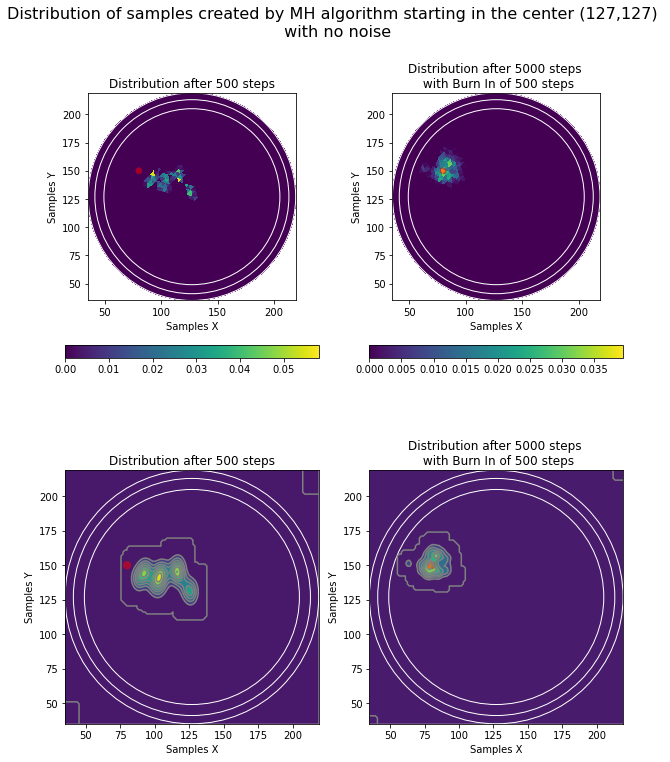

In [16]:
reload(evaluations)

path_mesh = path_meshs[-1]
s = samples[-1][0:2]

fig, ax = plt.subplots(2, 2, figsize=(10,12))
fig.subplots_adjust(wspace=.2)

im, vmin, vmax = evaluations.draw_cells(path_mesh,s[:,0:500],ax[0,0])
evaluations.set_ax(ax[0,0])
evaluations.draw_point(ax[0,0],point,0.5)
plt.colorbar(im, ax=ax[0,0],location="bottom")

evaluations.draw_densities(s[:,0:500],ax[1,0])
evaluations.set_ax(ax[1,0])
evaluations.draw_point(ax[1,0],point,0.5)

im, vmin, vmax = evaluations.draw_cells(path_mesh,s[:,500:5000],ax[0,1])
evaluations.set_ax(ax[0,1])
evaluations.draw_point(ax[0,1],point,0.5)
plt.colorbar(im, ax=ax[0,1],location="bottom")

evaluations.draw_densities(s[:,500:5000],ax[1,1])
evaluations.set_ax(ax[1,1])
evaluations.draw_point(ax[1,1],point,0.5)

fig.suptitle('Distribution of samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0,0].set_title('Distribution after 500 steps')
ax[0,1].set_title('Distribution after 5000 steps \n with Burn In of 500 steps')
ax[1,0].set_title('Distribution after 500 steps')
ax[1,1].set_title('Distribution after 5000 steps \n with Burn In of 500 steps')

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

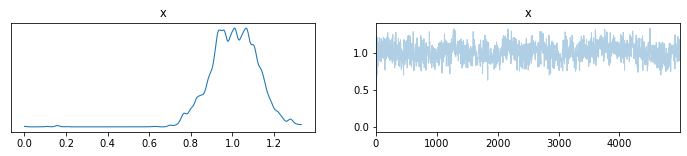

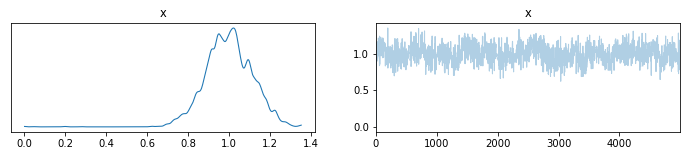

In [17]:
az.plot_trace(np.remainder(samples[-1][2,:],2*math.pi))
az.plot_trace(np.remainder(mlda_samples[2,:],2*math.pi))

Text(0.5, 1.0, 'MLDA')

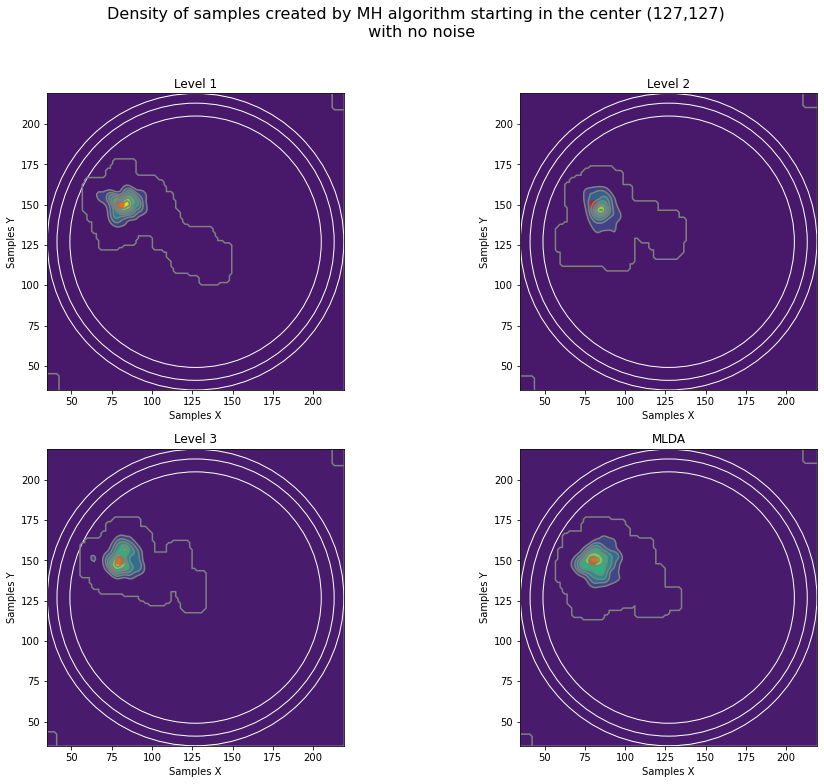

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.subplots_adjust(wspace=.3)

evaluations.draw_densities(samples[0][:,:],ax[0,0])
evaluations.set_ax(ax[0,0])
evaluations.draw_point(ax[0,0],point,0.5)

evaluations.draw_densities(samples[1][:,:],ax[0,1])
evaluations.set_ax(ax[0,1])
evaluations.draw_point(ax[0,1],point,0.5)

evaluations.draw_densities(samples[2][:,:],ax[1,0])
evaluations.set_ax(ax[1,0])
evaluations.draw_point(ax[1,0],point,0.5)

evaluations.draw_densities(mlda_samples[:,:],ax[1,1])
evaluations.set_ax(ax[1,1])
evaluations.draw_point(ax[1,1],point,0.5)

fig.suptitle('Density of samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0,0].set_title('Level 1')
ax[0,1].set_title('Level 2')
ax[1,0].set_title('Level 3')
ax[1,1].set_title('MLDA')